In [21]:
# TODO: short markdown readme on what this notebook does

In [22]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

DEFAULT_METRICS = ['time', 'adjusted_rand_score', 'adjusted_mutual_info_score']

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [23]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}'
results_dump = f'{full_path}/results_dump.json'

print(f'Reading from results dump: \033[1m{results_dump}')

Reading from results dump: results/res_2024_03_17_T20_05_57/results_dump.json


In [24]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

# extract the dataframe, reorder columns, display sample
results_df = json_to_df(results_dump)
results_df = results_df[[
  'log_time', 'experiment', 'variant', 'n_points', 'noise',
  'time', 'timed_out',
  'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'normalized_mutual_info_score', 'v_measure_score',
]]
results_df

,log_time,experiment,variant,n_points,noise,time,timed_out,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,homogeneity_score,normalized_mutual_info_score,v_measure_score
0,2024-03-17 20:05:58.978673,DEFAULT,DEFAULT,100,0.0,0.054708,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2024-03-17 20:05:58.998457,DEFAULT,DEFAULT,100,0.0,0.008427,False,0.794621,0.844843,0.797977,0.794289,0.796129,0.796129
2,2024-03-17 20:05:59.016951,DEFAULT,DEFAULT,100,0.0,0.007650,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2024-03-17 20:05:59.031314,DEFAULT,DEFAULT,100,0.0,0.008047,False,0.794621,0.844843,0.797977,0.794289,0.796129,0.796129
4,2024-03-17 20:05:59.045352,DEFAULT,DEFAULT,100,0.0,0.007824,False,0.928602,0.959996,0.929259,0.928991,0.929125,0.929125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,2024-03-18 01:45:16.328468,Standardisation,min-max,3000,0.2,8.086959,False,0.353722,0.448716,0.353880,0.353875,0.353878,0.353878
11245,2024-03-18 01:45:24.473032,Standardisation,min-max,3000,0.2,8.133979,False,0.388360,0.487964,0.388509,0.388505,0.388507,0.388507
11246,2024-03-18 01:45:32.640492,Standardisation,min-max,3000,0.2,8.158877,False,0.357777,0.453195,0.357960,0.357904,0.357932,0.357932
11247,2024-03-18 01:45:40.768987,Standardisation,min-max,3000,0.2,8.115843,False,0.368874,0.465856,0.369049,0.369002,0.369025,0.369025


In [25]:
# extract all the experiments and variants present in the dump
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
print('The following experiments and variants were found in results dump:')
padding = max([len(x) for x in experiment_variants.index])

for (experiment, variants) in experiment_variants.items():
    print(f'\033[1m{experiment:<{padding}}\033[0m: {", ".join(variants)}')

The following experiments and variants were found in results dump:
Affinity       : euclidean, manhattan
DEFAULT        : DEFAULT
Decomposition  : sparse_eigh, dense_eigh, dense, sparse
Laplacian      : standard, normalised
Refinement     : none, knn, eps
Standardisation: none, standard, min-max


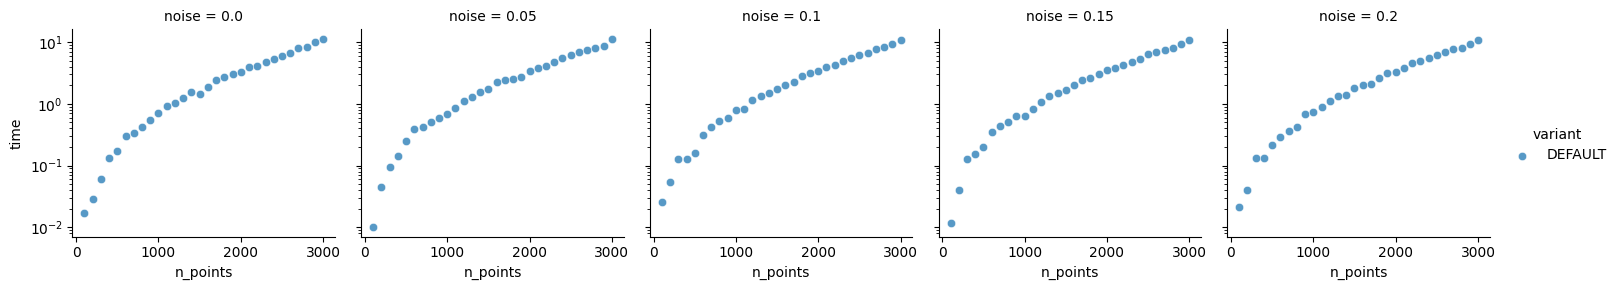

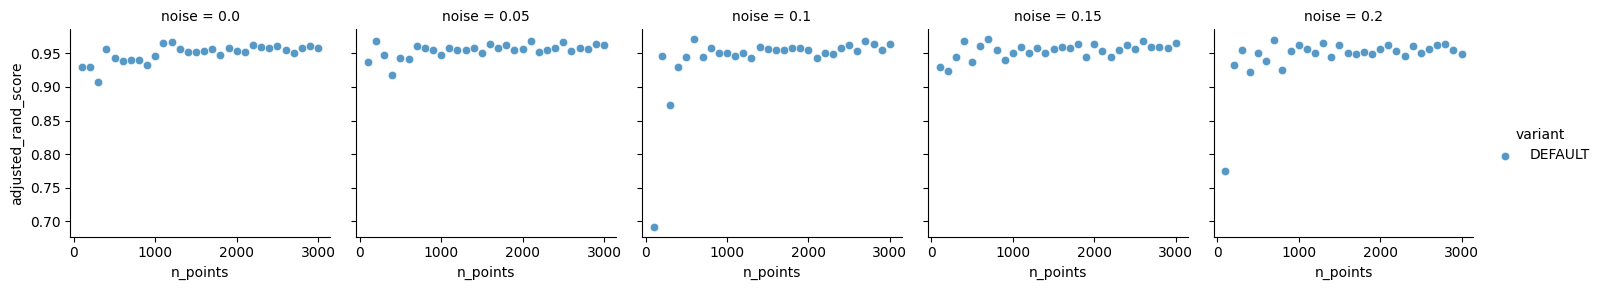

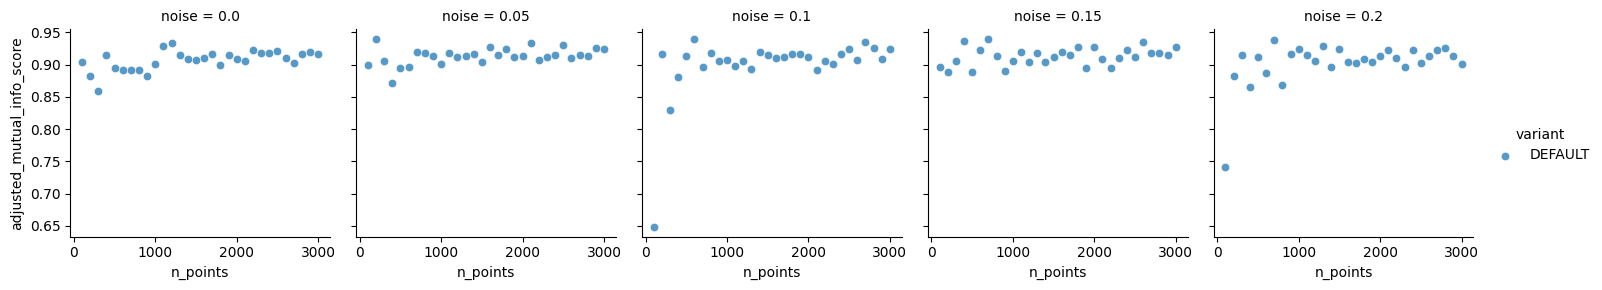

In [26]:
def show_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise", hue='variant')
        g.map_dataframe(sns.scatterplot, "n_points", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_experiment_results('DEFAULT')

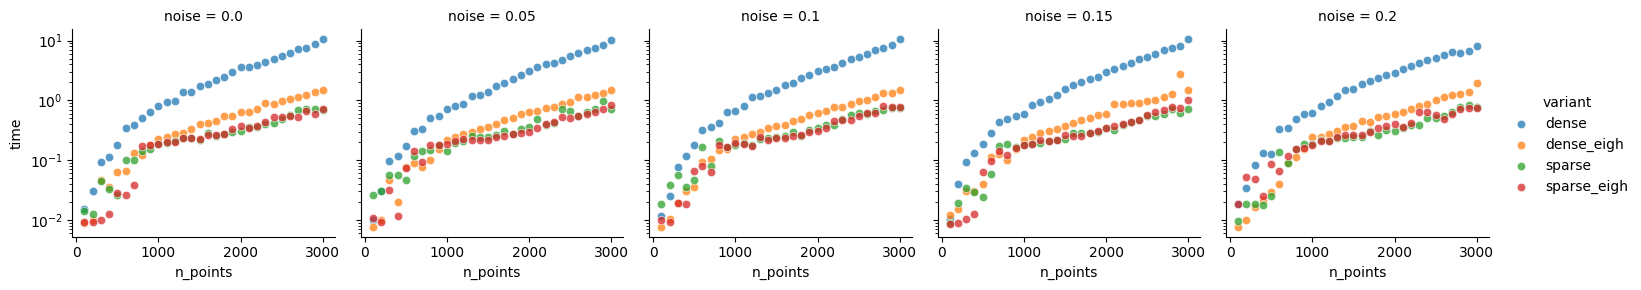

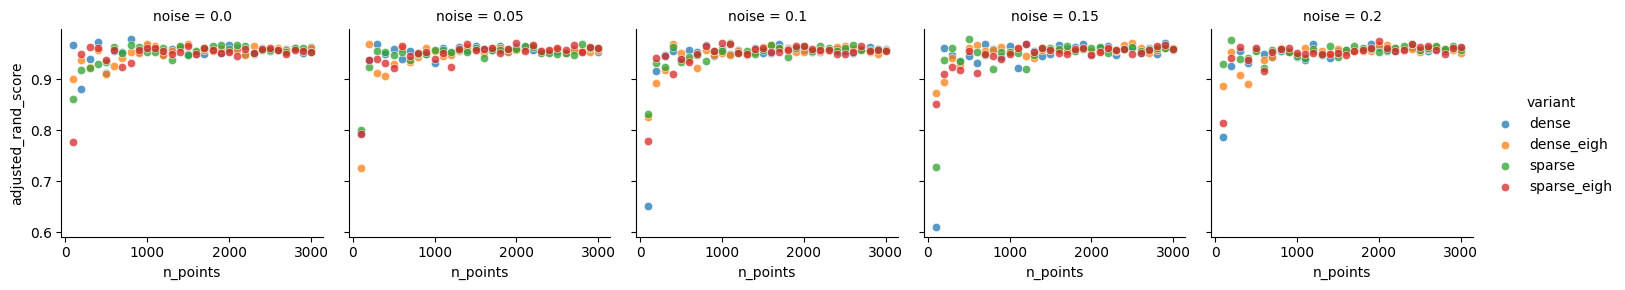

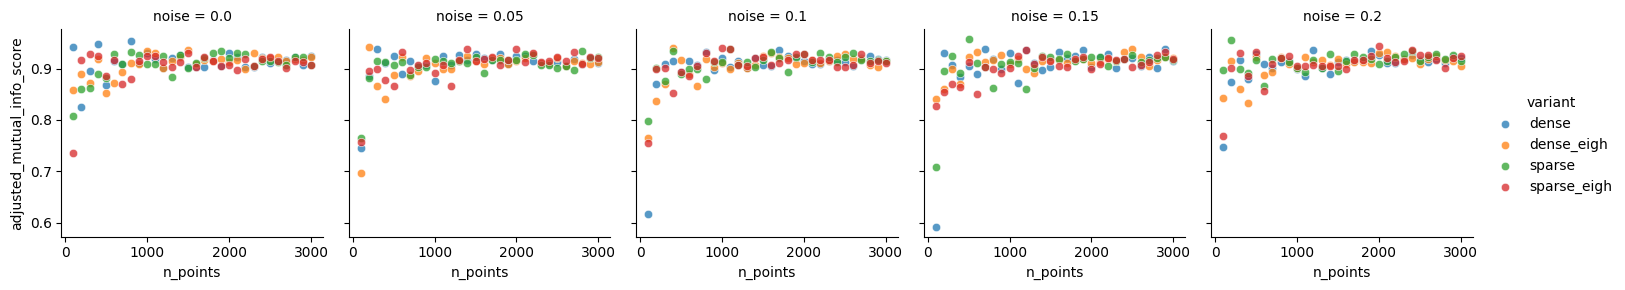

In [27]:
show_experiment_results('Decomposition')

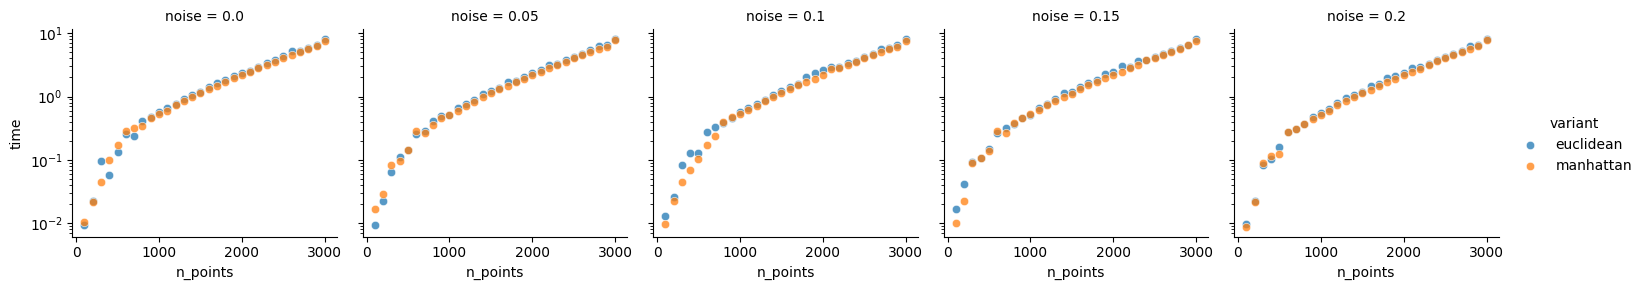

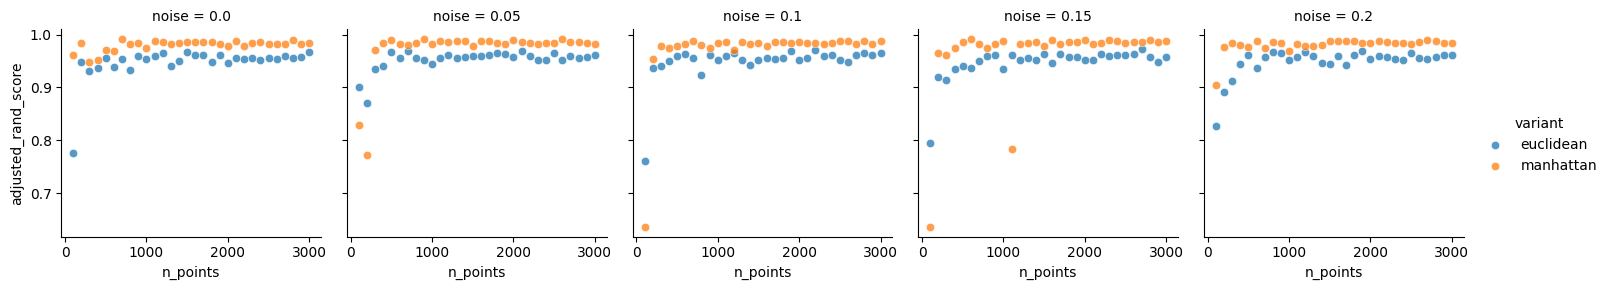

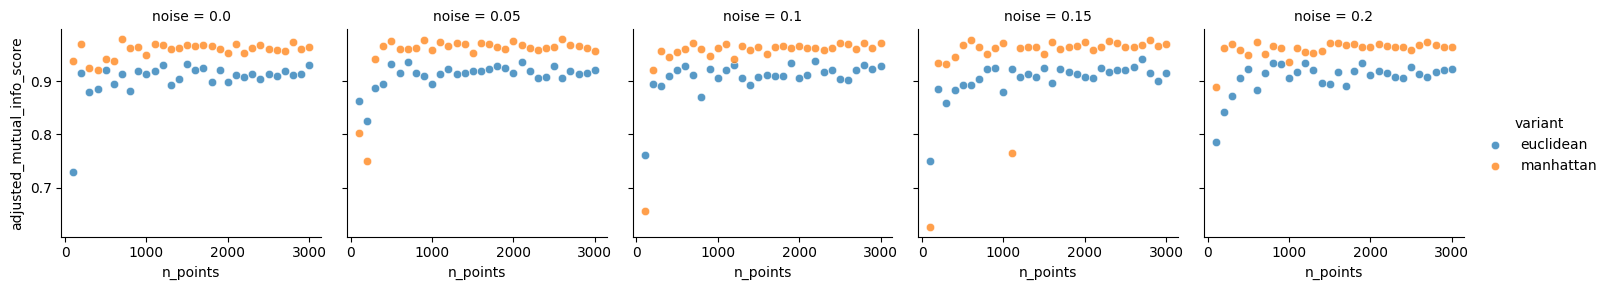

In [28]:
show_experiment_results('Affinity')

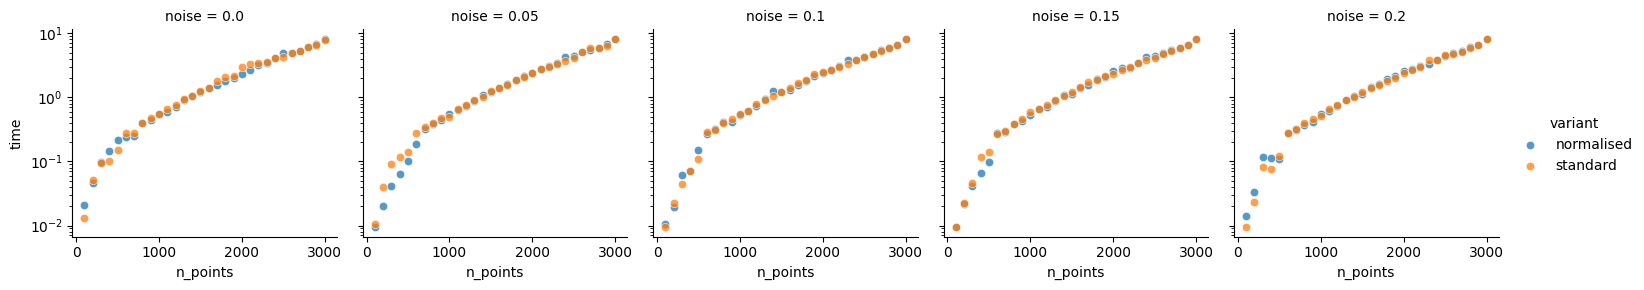

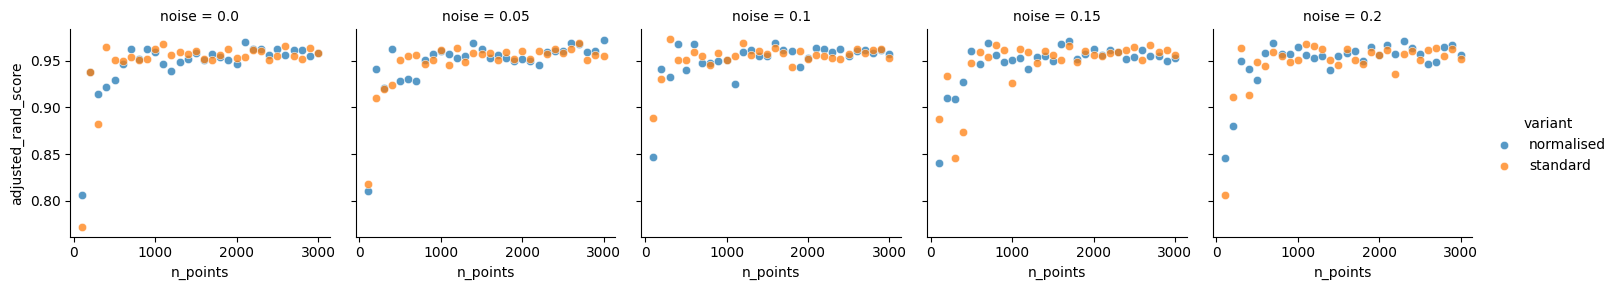

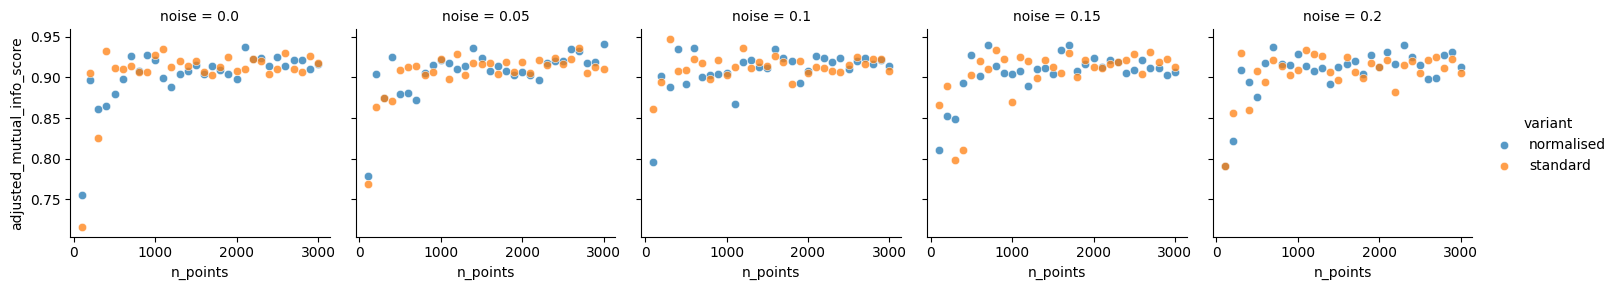

In [29]:
show_experiment_results('Laplacian')

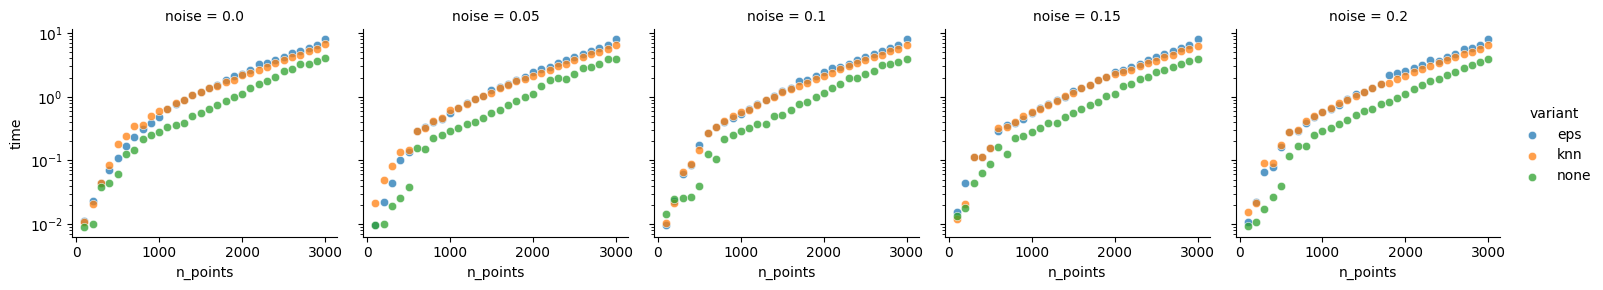

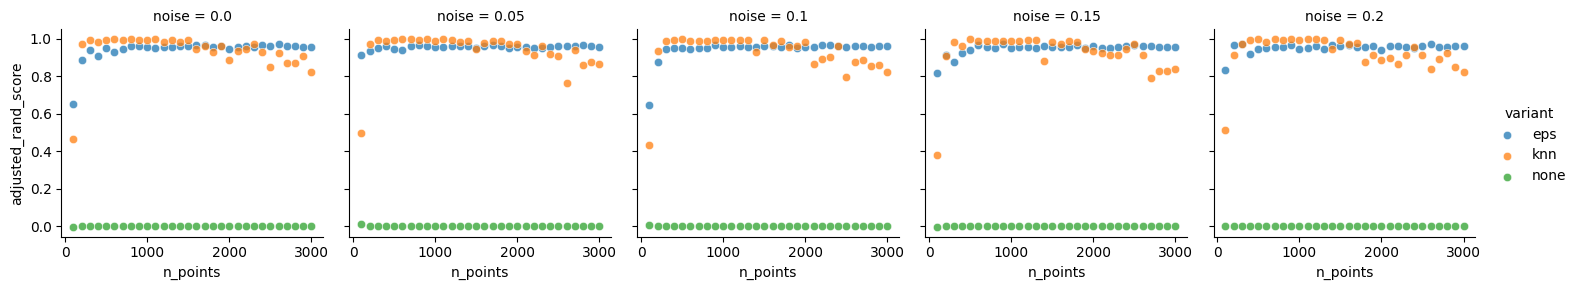

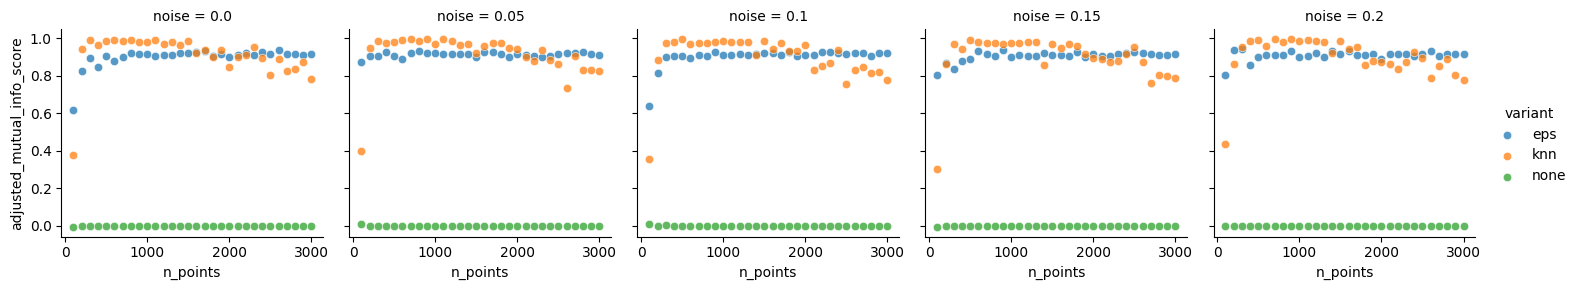

In [30]:
show_experiment_results('Refinement')

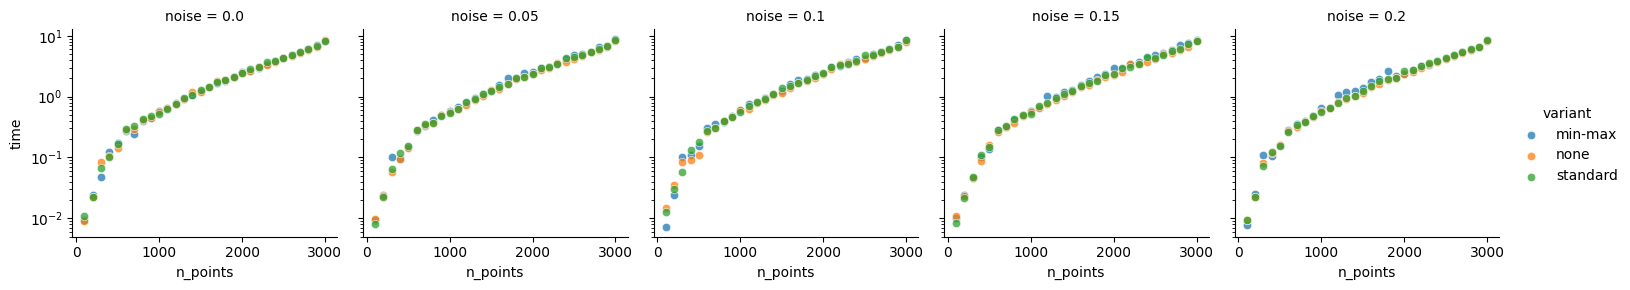

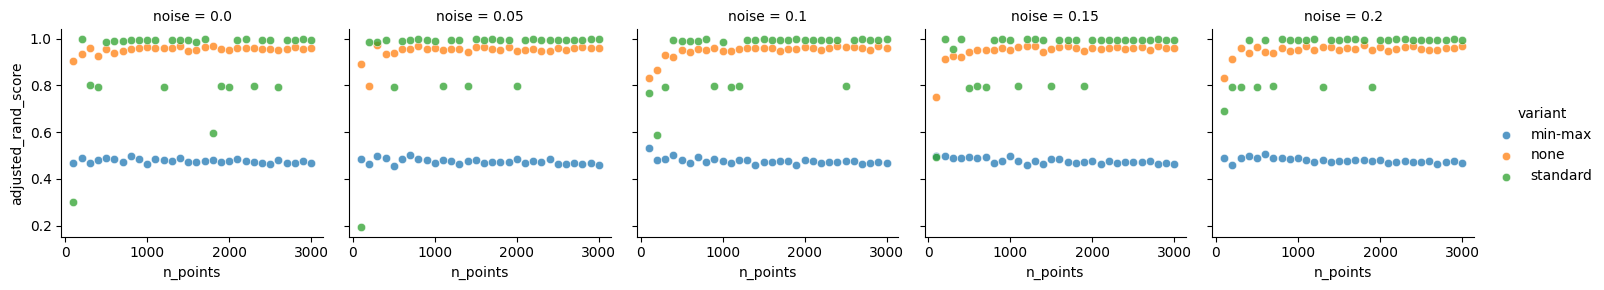

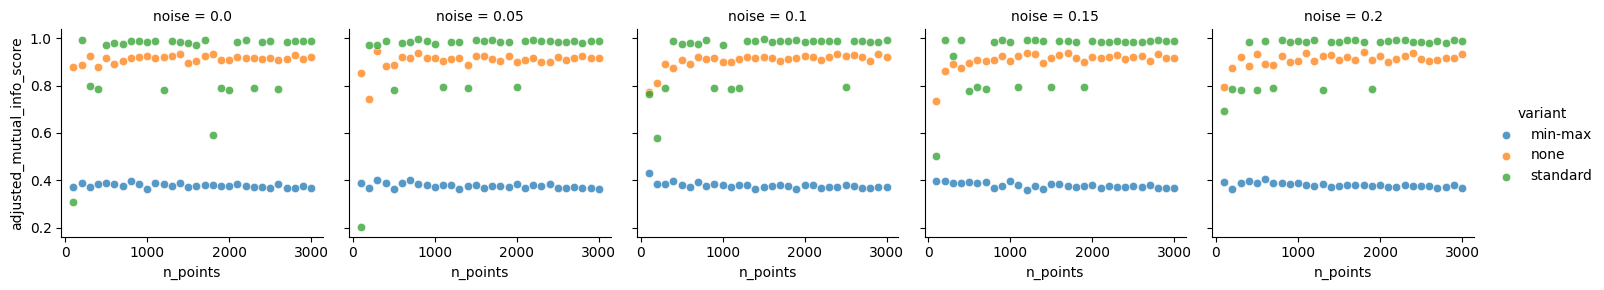

In [31]:
show_experiment_results('Standardisation')